In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

#torch.manual_seed(2)

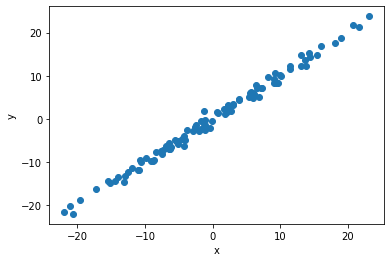

In [2]:
X = torch.randn(100,1) * 10
y = X + torch.randn(100,1)

plt.ylabel('y')
plt.xlabel('x')
plt.plot(X,y,'o')

In [3]:
model = nn.Linear(in_features=1, out_features=1)
w, b = model.parameters()

In [4]:
print(w)

Parameter containing:
tensor([[-0.0724]], requires_grad=True)


In [5]:
def get_params():
    return (w[0,0].item(), b[0].item())

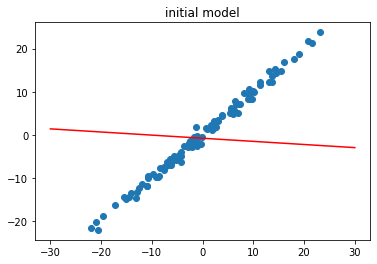

In [6]:
def plot_fit(title):
    plt.title(title)
    w1, b1 = get_params()
    
    x1 = np.array([-30,30])
    y1 = w1 * x1 + b1
    
    plt.plot(x1,y1,'r')
    plt.scatter(X, y)
    plt.show()

plot_fit("initial model")
    
    
    

In [7]:
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

In [8]:
epochs = 150
losses = []

for i in range (epochs):
    y_pred = model(X)
    loss = loss_func(y_pred, y)
    print(f"epoch: {i}, loss: {loss.item()}")
    
    losses.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() #gradient descent

epoch: 0, loss: 120.6675796508789
epoch: 1, loss: 1.6422163248062134
epoch: 2, loss: 1.4637547731399536
epoch: 3, loss: 1.4497283697128296
epoch: 4, loss: 1.436203956604004
epoch: 5, loss: 1.4229487180709839
epoch: 6, loss: 1.409956932067871
epoch: 7, loss: 1.3972243070602417
epoch: 8, loss: 1.3847441673278809
epoch: 9, loss: 1.3725131750106812
epoch: 10, loss: 1.3605252504348755
epoch: 11, loss: 1.34877610206604
epoch: 12, loss: 1.3372607231140137
epoch: 13, loss: 1.3259741067886353
epoch: 14, loss: 1.3149126768112183
epoch: 15, loss: 1.3040707111358643
epoch: 16, loss: 1.2934449911117554
epoch: 17, loss: 1.2830307483673096
epoch: 18, loss: 1.272823452949524
epoch: 19, loss: 1.2628196477890015
epoch: 20, loss: 1.2530144453048706
epoch: 21, loss: 1.2434049844741821
epoch: 22, loss: 1.233986258506775
epoch: 23, loss: 1.2247549295425415
epoch: 24, loss: 1.2157076597213745
epoch: 25, loss: 1.2068400382995605
epoch: 26, loss: 1.1981490850448608
epoch: 27, loss: 1.1896309852600098
epoch: 28

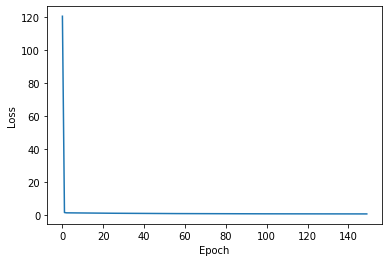

In [9]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(epochs),losses)

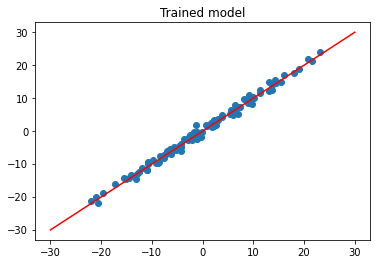

In [10]:
plot_fit("Trained model")